**Walmart Black Friday Purchase Behavior Analysis**



**Problem Statement :**

Walmart’s management wants to understand whether customer spending behavior differs across genders during Black Friday sales. Specifically, the business wants to determine if female customers spend more per transaction than male customers, and whether this observed difference is statistically significant when generalized to the full population of 100 million customers.


In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/walmart_data.txt")

In [ ]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


1.	What is the shape (rows, columns) of the dataset?

In [ ]:
data.shape

(550068, 10)

2.	What are the data types of each variable?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


3. Should any variables be converted to the category data type for better memory and analysis efficiency?

In [ ]:
cat_cols = ['Gender',
            'Age',
            'City_Category',
            'Stay_In_Current_City_Years',
            'Marital_Status',
            'Product_Category']


In [ ]:
for col in cat_cols:
  data[col] = data[col].astype('category')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 19.9+ MB


4.	Are there any missing (null) values in the dataset?

In [ ]:
data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


5.	Are there outliers in the Purchase amount?

In [ ]:
Q1 = np.percentile(data['Purchase'], 25)
Q3 = np.percentile(data['Purchase'], 75)


In [ ]:
IQR = Q3 - Q1
IQR

np.float64(6231.0)

In [ ]:
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = data[(data['Purchase'] < Lower_bound) | (data['Purchase'] > Upper_bound)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


<Axes: ylabel='Purchase'>

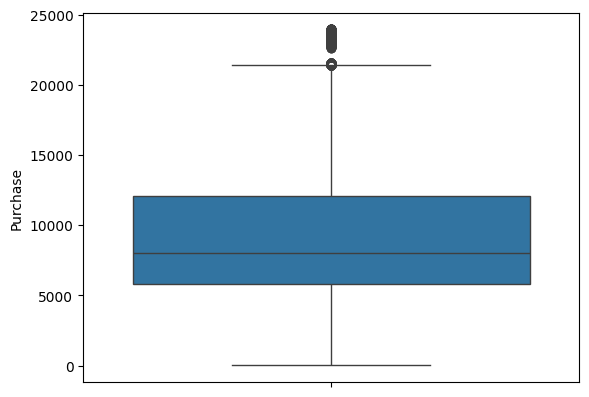

In [ ]:
sns.boxplot(data['Purchase'])

6.	How do mean and median differences indicate skewness or outliers?

In [ ]:
mean = np.mean(data['Purchase'])
median = np.median(data['Purchase'])

print(mean)
print(median)

9263.968712959126
8047.0


In [ ]:
mean > median

np.True_

Right Skewed

 Exploratory Data Analysis (EDA)

1.	What are the unique values and counts for:

Gender

Age


Marital_Status

City_Category

ProductCategory


In [ ]:
Eda_cols = ['Gender',
            'Age',
            'City_Category',
            'Marital_Status',
            'Product_Category']

In [ ]:
for i in Eda_cols:
  print(data[i].value_counts())
  print("Unique_Values :", data[i].nunique())
  print("=" * 50)

Gender
M    414259
F    135809
Name: count, dtype: int64
Unique_Values : 2
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Unique_Values : 7
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
Unique_Values : 3
Marital_Status
0    324731
1    225337
Name: count, dtype: int64
Unique_Values : 2
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
Unique_Values : 20


10.	What is the statistical summary (mean, median, std, min, max) of Purchase?

In [ ]:
  print("Mean :", np.mean(data['Purchase']))
  print("Median :", np.median(data['Purchase']))
  print("Std_dev :", np.std(data['Purchase']))
  print("Min :", np.min(data['Purchase']))
  print("Max :", np.max(data['Purchase']))

Mean : 9263.968712959126
Median : 8047.0
Std_dev : 5023.060827959972
Min : 12
Max : 23961


Univariate Analysis

1.	Is the purchase distribution normal or skewed?

/tmp/ipython-input-3149472314.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'], hist = True, kde = True,norm_hist=True)


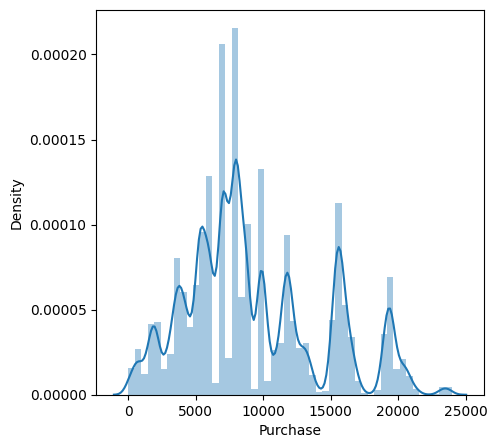

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['Purchase'], hist = True, kde = True,norm_hist=True)
plt.show()

Bivariate Analysis

1. How does purchase amount vary by gender?

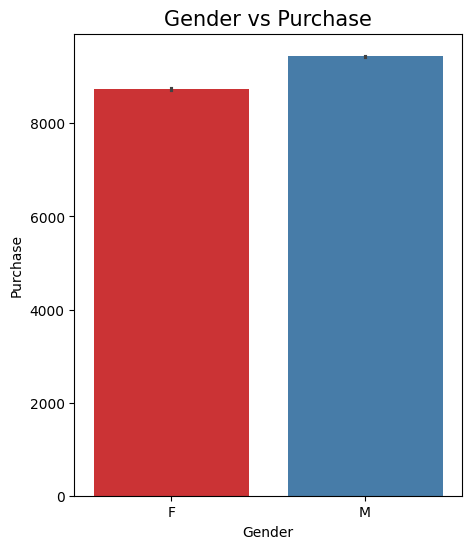

In [ ]:
plt.figure(figsize = (5,6))
sns.barplot(x = data['Gender'],y = data['Purchase'],  hue = data['Gender'], palette = 'Set1')
plt.title('Gender vs Purchase',fontsize = 15)
plt.show()


2. How does purchase amount vary by marital status?

/tmp/ipython-input-2169869322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['Marital_Status'],y = data['Purchase'],palette='muted')


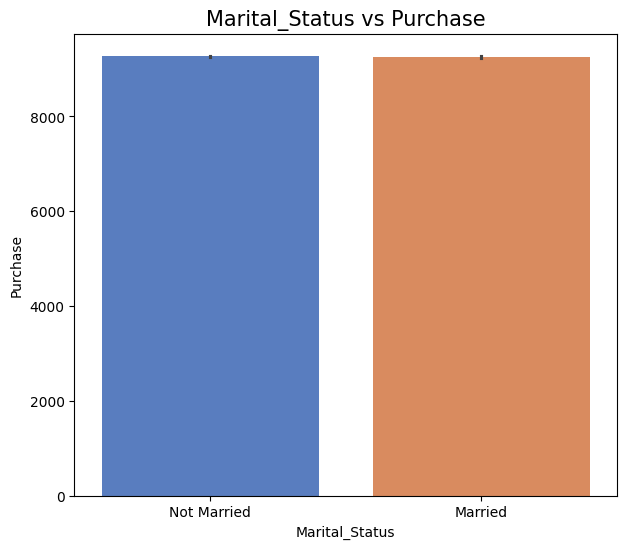

In [ ]:
plt.figure(figsize = (7,6))
sns.barplot(x = data['Marital_Status'],y = data['Purchase'],palette='muted')
plt.title('Marital_Status vs Purchase',fontsize = 15)
plt.xticks(ticks = [0,1], labels = ['Not Married','Married'])
plt.show()

3. How does purchase amount vary across age groups?

/tmp/ipython-input-1618066063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['Age'],y = data['Purchase'],palette='pastel')


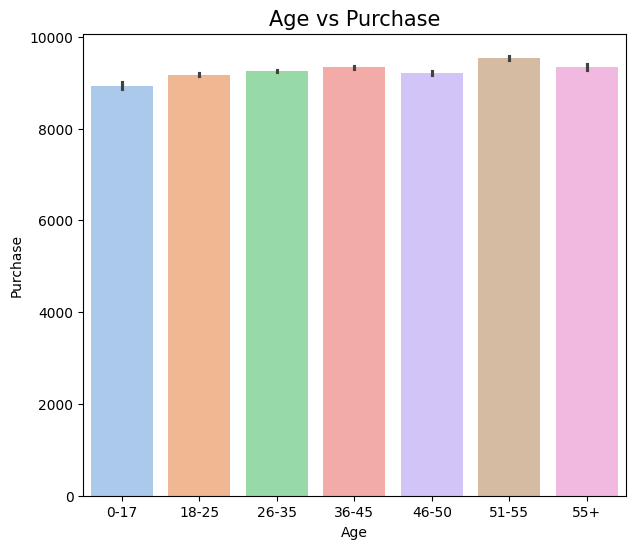

In [ ]:
plt.figure(figsize = (7,6))
sns.barplot(x = data['Age'],y = data['Purchase'],palette='pastel')
plt.title('Age vs Purchase',fontsize = 15)
plt.show()

4.	Which demographic group shows higher variability in spending?

<Axes: xlabel='Gender', ylabel='Purchase'>

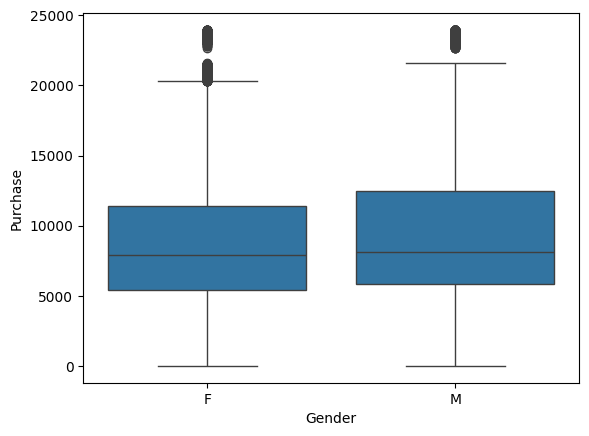

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=data)


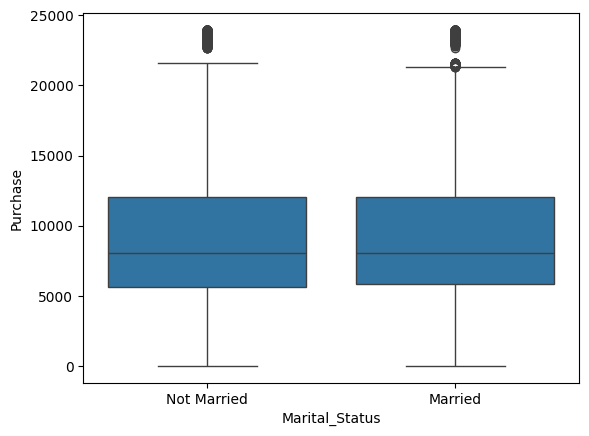

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=data)
plt.xticks(ticks = [0,1], labels = ['Not Married','Married'])
plt.show()

Gender-Based Spending Analysis

1.	What is the average purchase amount per transaction for:

•	Female customers

•	Male customers


In [ ]:
avg_purchase_gender = data.groupby('Gender')['Purchase'].mean().round(2)
avg_purchase_gender

/tmp/ipython-input-1231654458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_gender = data.groupby('Gender')['Purchase'].mean().round(2)


,Purchase
Gender,
F,8734.57
M,9437.53


In [ ]:
avg_purchase_gender_diff = avg_purchase_gender['M'] - avg_purchase_gender['F']
avg_purchase_gender_diff

np.float64(702.960000000001)

Inferential Analysis (CLT & Confidence Intervals)

1.	Why is the Central Limit Theorem applicable to Walmart’s Black Friday transaction data?

To show that even though purchase data is skewed, the distribution of sample means becomes normal as sample size increases — which proves the Central Limit Theorem.

Using random samples:

What is the sampling distribution of the mean for male customers?

In [4]:
male_pur = data[data['Gender'] == 'M']['Purchase']

In [5]:
sample_means = []

for i in range (1000):
  sample = np.random.choice(male_pur, size = 50, replace = True)
  sample_means.append(sample.mean())

/tmp/ipython-input-4230345748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist = False, kde = True)


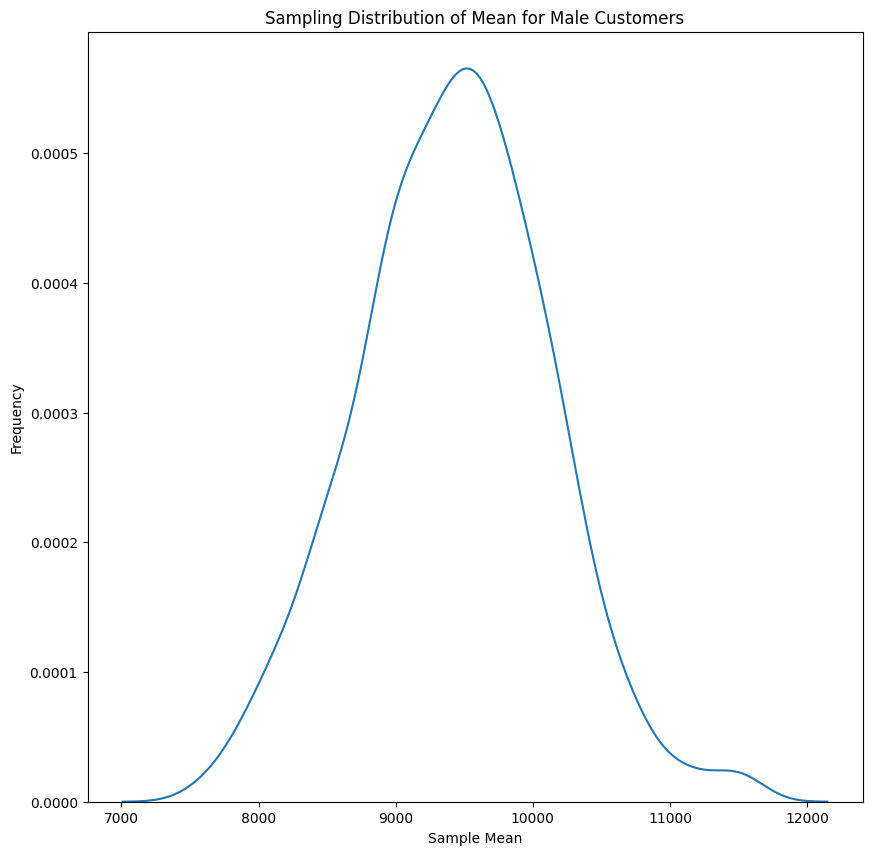

In [8]:
plt.figure(figsize = (10,10))
sns.distplot(sample_means, hist = False, kde = True)
plt.title('Sampling Distribution of Mean for Male Customers')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [34]:
from scipy.stats import norm

In [78]:
norm_sample_mean = np.mean(sample_means)
norm_sample_std = np.std(sample_means)
n = 50
SE = norm_sample_std / np.sqrt(n)

What is the 90% confidence interval for the average spending of male customers?

In [79]:
norm.interval(0.90,loc = norm_sample_mean, scale = SE)

(np.float64(9264.427823120555), np.float64(9588.842536879443))

What is the 95% confidence interval for the average spending of male customers?

In [80]:
norm.interval(0.95,loc = norm_sample_mean, scale = SE)

(np.float64(9233.353192896764), np.float64(9619.917167103235))

What is the 99% confidence interval for the average spending of male customers?

In [81]:
norm.interval(0.95,loc = norm_sample_mean, scale = SE)

(np.float64(9233.353192896764), np.float64(9619.917167103235))

What is the sampling distribution of the mean for female customers?

In [9]:
fem_pur = data[data['Gender'] == 'F']['Purchase']

In [29]:
sample_means_fem = []

for i in range (1000):
  sample_fem = np.random.choice(fem_pur, size = 50, replace = True)
  sample_means_fem.append(sample_fem.mean())

/tmp/ipython-input-1650203593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_fem, hist = False, kde = True)


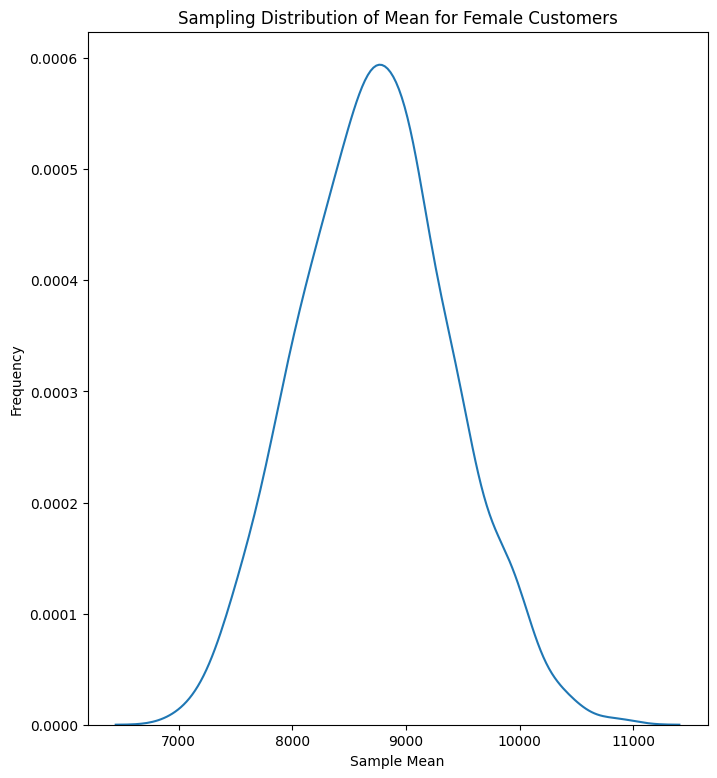

In [30]:
plt.figure(figsize = (8,9))
sns.distplot(sample_means_fem, hist = False, kde = True)
plt.title('Sampling Distribution of Mean for Female Customers')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [74]:
norm_sample_mean_fem = np.mean(sample_means_fem)
norm_sample_std_fem = np.std(sample_means_fem)
n_fem = 50
SE_fem = norm_sample_std_fem / np.sqrt(n_fem)

What is the 90% confidence interval for the average spending of female customers?

In [75]:
norm.interval(0.90,loc = norm_sample_mean_fem, scale = SE_fem)

(np.float64(8580.660572416487), np.float64(8886.838947583517))

What is the 95% confidence interval for the average spending of female customers?

In [76]:
norm.interval(0.95,loc = norm_sample_mean_fem, scale = SE_fem)

(np.float64(8551.332741750002), np.float64(8916.166778250003))

What is the 99% confidence interval for the average spending of female customers?

In [77]:
norm.interval(0.99,loc = norm_sample_mean_fem, scale = SE_fem)

(np.float64(8494.01316035803), np.float64(8973.486359641975))

Do the confidence intervals for male and female average spending overlap? What does this imply?

The confidence intervals for average male and female spending overlap across all confidence levels (90%, 95%, and 99%). This overlap indicates that the difference in average spending between male and female customers is not statistically significant. Therefore, Walmart cannot conclude that one gender spends more than the other at the population level, and gender alone should not be used as a primary factor for differentiated pricing strategies.

How does changing the confidence level (90%, 95%, 99%) impact business certainty and risk?

Increasing the confidence level increases business certainty but also widens the confidence interval, reducing precision. A 90% confidence level provides a narrower interval but carries higher risk, while a 99% confidence level offers greater certainty at the cost of wider intervals. Walmart typically uses a 95% confidence level to balance decision reliability and business agility.

1. Use 90% CI for:

    A/B testing

    Promotional pilots

2. Use 95% CI for:

    Marketing budget decisions

3. Use 99% CI for:

    Pricing changes with high financial impact

How does increasing sample size affect the shape of the sampling distribution and the confidence interval width?

Increasing the sample size makes the sampling distribution of the mean more normally distributed due to the Central Limit Theorem. At the same time, the standard error decreases, leading to narrower confidence intervals. This improves the precision and reliability of population mean estimates.

Marital Status Analysis

Do married customers spend more per transaction than unmarried customers?

In [58]:
married = data[data['Marital_Status'] == 1]['Purchase']
unmarried = data[data['Marital_Status'] == 0]['Purchase']

In [82]:
sample_means_married = []

for i in range (1000):
  sample_married = np.random.choice(married, size = 50, replace = True)
  sample_means_married.append(sample_married.mean())

/tmp/ipython-input-3809613272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_married, hist = False, kde = True)


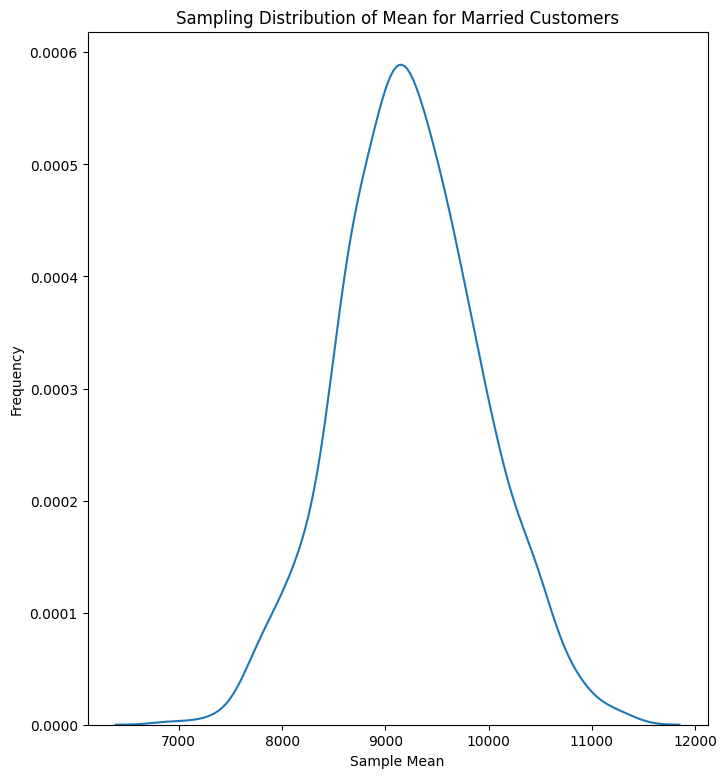

In [83]:
plt.figure(figsize = (8,9))
sns.distplot(sample_means_married, hist = False, kde = True)
plt.title('Sampling Distribution of Mean for Married Customers')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [84]:
sample_means_unmarried = []

for i in range (1000):
  sample_unmarried = np.random.choice(unmarried, size = 50, replace = True)
  sample_means_unmarried.append(sample_unmarried.mean())

/tmp/ipython-input-3272207701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_unmarried, hist = False, kde = True)


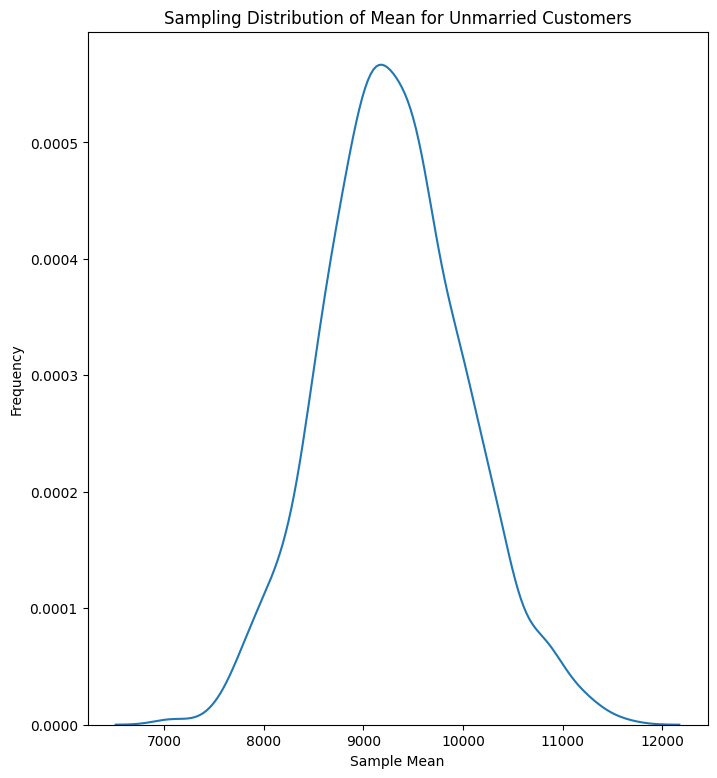

In [85]:
plt.figure(figsize = (8,9))
sns.distplot(sample_means_unmarried, hist = False, kde = True)
plt.title('Sampling Distribution of Mean for Unmarried Customers')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [86]:
# Married
mean_m = married.mean()
std_m = married.std()
n_m = 50
SE_m = std_m / np.sqrt(n_m)

# Unmarried
mean_u = unmarried.mean()
std_u = unmarried.std()
n_u = 50
SE_u = std_u / np.sqrt(n_u)

In [87]:
ci_m = norm.interval(0.95, loc=mean_m, scale=SE_m)
ci_u = norm.interval(0.95, loc=mean_u, scale=SE_u)

ci_m = tuple(round(x, 2) for x in ci_m)
ci_u = tuple(round(x, 2) for x in ci_u)

print("Married CI:", ci_m)
print("Unmarried CI:", ci_u)

Married CI: (np.float64(7870.59), np.float64(10651.76))
Unmarried CI: (np.float64(7872.42), np.float64(10659.39))


Are the confidence intervals for married and unmarried customers overlapping?

The confidence intervals for married and unmarried customers overlap, indicating that the difference in their average spending is not statistically significant. Therefore, marital status alone does not meaningfully distinguish spending behavior during Black Friday.

 Age-Based Spending Analysis

Which age group contributes the highest average purchase amount during Black Friday?

In [93]:
age_0_17 = data[(data['Age']=='0-17')]['Purchase']
age_18_25 = data[(data['Age']=='18-25')]['Purchase']
age_26_35 = data[(data['Age']=='26-35')]['Purchase']
age_36_45 = data[(data['Age']=='36-45')]['Purchase']
age_46_50 = data[(data['Age']=='46-50')]['Purchase']
age_51_55 = data[(data['Age']=='51-55')]['Purchase']
age_55_plus = data[(data['Age']=='55+')]['Purchase']

In [97]:
age_groups = {
    '0-17': age_0_17,
    '18-25': age_18_25,
    '26-35': age_26_35,
    '36-45': age_36_45,
    '46-50': age_46_50,
    '51-55': age_51_55,
    '55+':   age_55_plus
}


/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


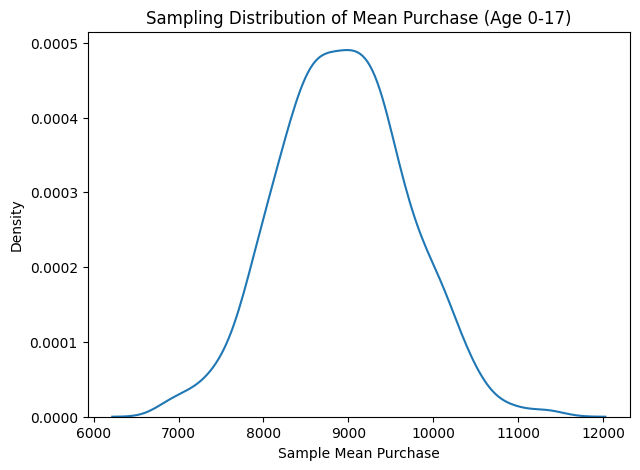

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


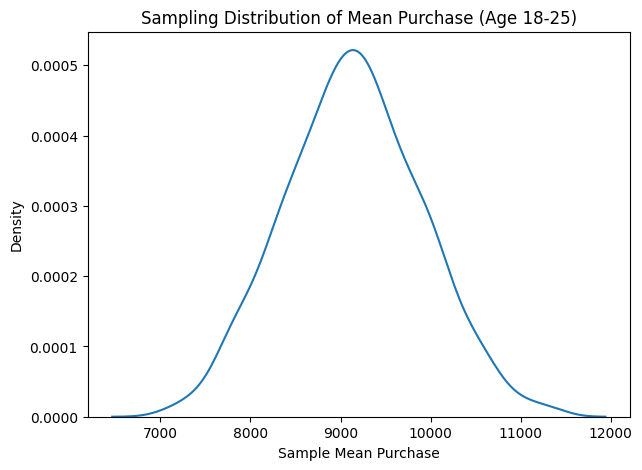

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


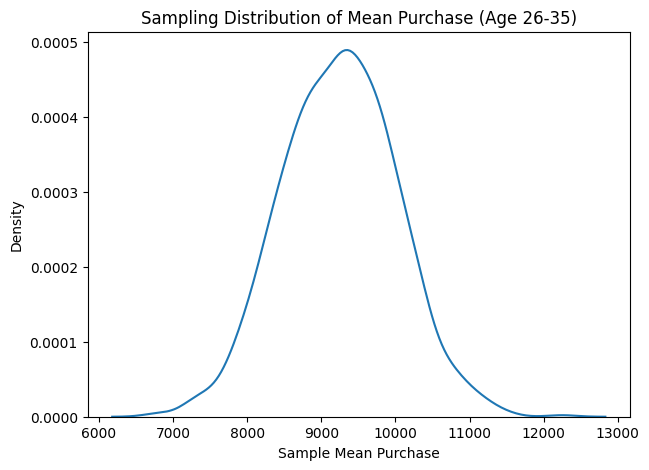

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


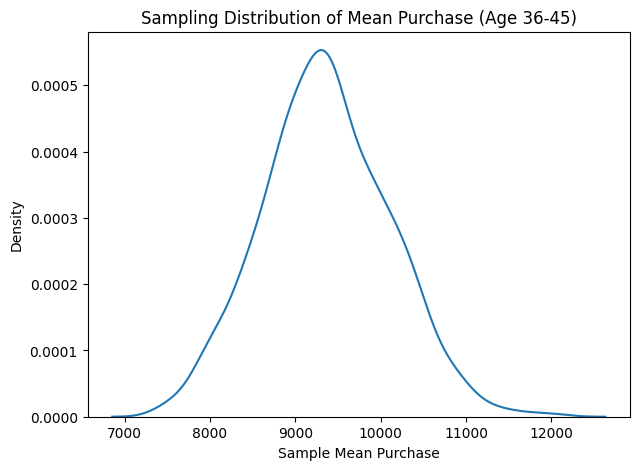

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


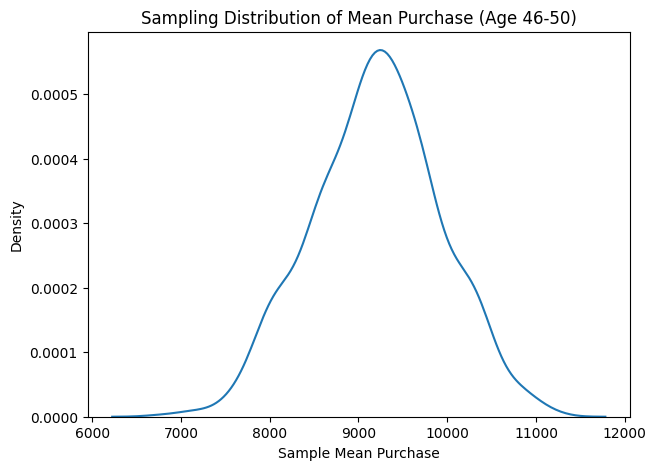

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


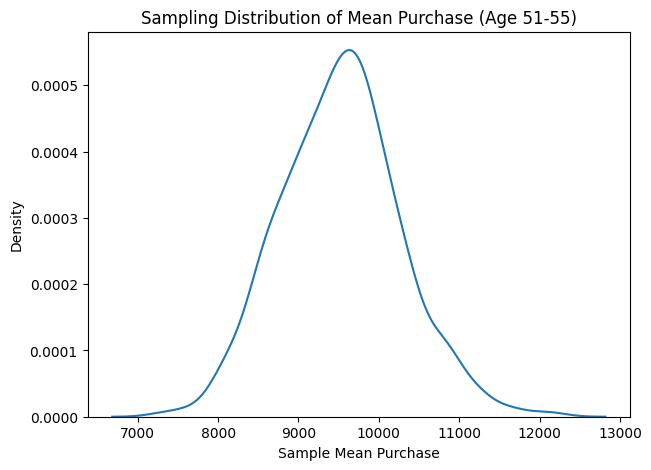

/tmp/ipython-input-605023528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means, hist=False, kde=True)


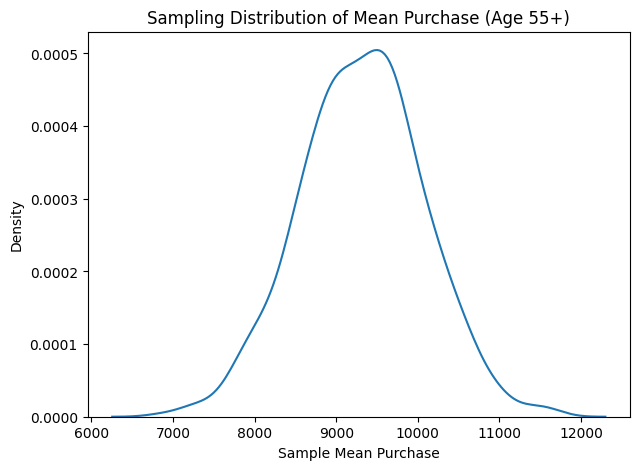

In [104]:
for age_label, age_data in age_groups.items():

    sample_means = []

    for _ in range(1000):
        sample = np.random.choice(age_data, size=45, replace=True)
        sample_means.append(sample.mean())

    plt.figure(figsize=(7,5))
    sns.distplot(sample_means, hist=False, kde=True)

    plt.title(f"Sampling Distribution of Mean Purchase (Age {age_label})")
    plt.xlabel("Sample Mean Purchase")
    plt.ylabel("Density")

    plt.show()


In [107]:
for age_label, age_data in age_groups.items():
  mean_age_label = age_data.mean()
  std_age_label = age_data.std()
  n_age_label = 50
  SE_age_label = std_age_label / np.sqrt(n_age_label)

  ci_age_label = norm.interval(0.95, loc=mean_age_label, scale=SE_age_label)
  print(f"{age_label} : {ci_age_label}")



0-17 : (np.float64(7516.762139836455), np.float64(10350.167141053493))
18-25 : (np.float64(7774.246384482343), np.float64(10565.080828040234))
26-35 : (np.float64(7863.868842621841), np.float64(10641.512423117934))
36-45 : (np.float64(7939.092812196464), np.float64(10723.608577639283))
46-50 : (np.float64(7831.80886554919), np.float64(10585.442529387465))
51-55 : (np.float64(8124.687455481226), np.float64(10944.928606439245))
55+ : (np.float64(7947.19072060696), np.float64(10725.37019829185))


Insights :
Among all age groups, customers aged 51–55 show the highest average purchase amount during Black Friday. This may be attributed to higher purchasing power and stable income levels. However, overlapping confidence intervals across age groups indicate that age alone may not be a strong differentiator of spending behavior.

Which age group shows the most stable spending behavior?

The 46–50 age group exhibits the most stable spending behavior, as indicated by the narrowest confidence interval among all age groups. This suggests lower variability and more consistent purchase amounts during Black Friday.

Are age-based spending differences consistent at the population level?

Although differences in average spending are observed across age groups in the sample data, the confidence intervals for these groups overlap significantly. This suggests that age-based spending differences are not consistent at the population level, and age alone is not a strong predictor of spending behavior during Black Friday.

Overall Insights :

Overall Recommendation :